# Trabalho Individual 2

**Este notebook serve apenas como apioo para o relatório, estando toda as perguntas agrupadas num único código que poderá ser útil para cada uma delas**

### Imports

In [1]:
import pandas as pd
import random
import numpy as np
import math
from itertools import combinations
from matplotlib import lines
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.width', 1000)
import IPython

### Functions

In [2]:
# Visualização da solução
def sort_key(item):
    return int(item[1][1:])

def SomaAptidao(teste, copia):
    total = 0
    coluna = 0
    for linha in teste:
        total += copia.loc[linha, copia.columns[coluna]]
        coluna += 1
    return total

## Leitura do ficheiro

**É importante referir que *distance_matrix* é o dataframe que possui os dados sobre as aptidões dos cientistas nos projetos**

In [3]:
distance_matrix = pd.read_excel('ProjetosCientistas.xlsx')
distance_matrix.columns = map(str.strip, distance_matrix.columns)
distance_matrix.index += 1
distance_matrix

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
1,70,65,55,50,90,67,80,62,100,85
2,74,83,54,60,100,75,50,76,82,45
3,71,87,66,58,74,81,48,52,100,64
4,50,89,78,63,51,40,48,100,68,75
5,100,66,83,77,54,58,93,89,53,48
6,80,55,70,65,94,47,60,88,73,60
7,87,63,90,79,47,77,90,76,85,90
8,67,95,100,40,70,54,70,100,65,57
9,90,45,88,48,65,68,80,46,71,67
10,67,77,50,60,100,70,80,60,65,70


## Exercicio a, b, c)

**Nesta alínea encontra-se o código que se encontra relacionado com a criação da heurística.** \
**No relatório, encontra-se a explicação da heurística e a interpretação dos resultados.**

In [4]:
# Cria uma cópia do DataFrame distance_matrix
novo_dataframe = distance_matrix.copy()

# Calcula a média das linhas
media_linhas = novo_dataframe.mean(axis=1)

# Cria um novo DataFrame com as colunas "Cientista" e "Média"
df_media = pd.DataFrame({'Cientistas': range(1, len(media_linhas) + 1), 'Média': media_linhas})

# Ordena o DataFrame pela coluna "Média" em ordem crescente
df_media = df_media.sort_values('Média')

# Adiciona a legenda "Cientista número X"
df_media['Cientistas'] = 'Cientista ' + df_media['Cientistas'].astype(str)

# Define o índice do DataFrame
df_media = df_media.reset_index(drop=True)
df_media.index = pd.RangeIndex(start=1, stop=11, step=1)

# Exibe o novo DataFrame ordenado
print(df_media)

      Cientistas  Média
1    Cientista 4   66.2
2    Cientista 9   66.8
3    Cientista 6   69.2
4    Cientista 2   69.9
5   Cientista 10   69.9
6    Cientista 3   70.1
7    Cientista 8   71.8
8    Cientista 5   72.1
9    Cientista 1   72.4
10   Cientista 7   78.4


Projeto P1 | Cientista 9 | Aptidão: 90
Projeto P2 | Cientista 2 | Aptidão: 83
Projeto P3 | Cientista 8 | Aptidão: 100
Projeto P4 | Cientista 5 | Aptidão: 77
Projeto P5 | Cientista 6 | Aptidão: 94
Projeto P6 | Cientista 7 | Aptidão: 77
Projeto P7 | Cientista 10 | Aptidão: 80
Projeto P8 | Cientista 4 | Aptidão: 100
Projeto P9 | Cientista 3 | Aptidão: 100
Projeto P10 | Cientista 1 | Aptidão: 85

A combinação ótima é: [9, 2, 8, 5, 6, 7, 10, 4, 3, 1]
A aptidão total foi: 886


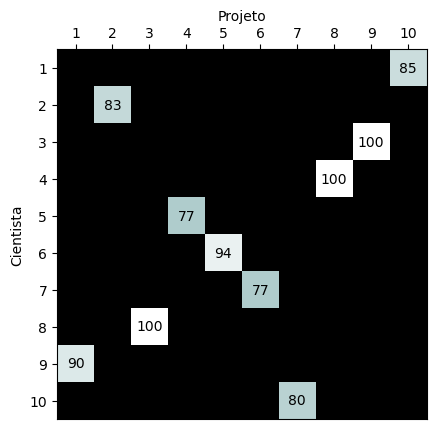

In [5]:
# Vamos organizar os cientistas pela sua média de aptidão, de forma crescente, atribuindo a cada cientista o melhor projeto para ele dos restantes.

## Ordenar os Cientistas do melhor para o pior, relativamente à média das aptidões
copia = distance_matrix.copy()
media_linhas = copia.mean(axis=1) #Calcular a média de cada alinea (Cientista)
BestScience = list(media_linhas.sort_values().index) #Ordenar, por ordem crescente da aptidão média, os cientistas

## Associar o melhor projeto a cada um dos cientistas, do pior ao melhor, sem nunca repetir os projetos
mostrar = []
valor_maximo = 0
for linha in BestScience:
    coluna = copia.loc[linha].idxmax()
    valor_maximo += copia.loc[linha, coluna]
    mostrar.append([linha, coluna, copia.loc[linha, coluna]])
    copia = copia.drop(coluna, axis=1)
copia = distance_matrix.copy()

## O index+1 da lista BestScience corresponde ao projeto associado, o valor corresponde ao cientista
lista_ordenada = sorted(mostrar, key=sort_key)
BestScience = []
for i in lista_ordenada:
    # print(f"Cientista C{i[0]} no Projeto {i[1]} com uma aptidão de {i[2]}")
    print(f"Projeto \033[1m{i[1]}\033[0m | Cientista \033[1m{i[0]}\033[0m | Aptidão: \033[1m{i[2]}\033[0m")
    BestScience.append(i[0])
    
# Direitos autorais do Botas (deixar negrito)
print("\n======================================================")
print(f"A combinação ótima é: \033[1m{BestScience}\033[0m")
print(f"A aptidão total foi: \033[1m{valor_maximo}\033[0m")
print("======================================================")

## Criação da matriz da Respetiva Solução
nodes = len(distance_matrix)
ciencia=np.zeros([nodes,nodes], dtype=int)
for p in range(len(distance_matrix)):
    linha = BestScience[p] - 1
    coluna = p
    ciencia[linha][coluna]=copia.loc[linha + 1, copia.columns[p]] #Colocar o valor de aptidão respetivo na matriz, dando o cientista e o projeto, os restantes fica 0

fig, ax = plt.subplots()
im = ax.imshow(ciencia, cmap='bone')

ax.set_xticks(range(nodes))
ax.set_yticks(range(nodes))
ax.set_xticklabels(range(1, nodes + 1))
ax.set_yticklabels(range(1, nodes + 1))
ax.xaxis.set_label_position('top')  # Posicionar o xlabel no topo
ax.xaxis.tick_top()  # Posicionar os ticks no topo
ax.set_xlabel('Projeto')
ax.set_ylabel('Cientista')

for i in range(nodes):
    for j in range(nodes):
        value = ciencia[i, j]
        text = ax.text(j, i, "" if value == 0 else value, ha='center', va='center', color='black')

# Mostrar o gráfico
plt.show()

## Exercicio d, e, f)

**Nesta parte do código, passamos para a criação da solução vizinha aleatória, onde esta será explicada no relatório de forma detalhada**

    Neste passo do código serão trocados 2 cientistas aleatoriamente. Em baixo podemos então visualizar as consequências de trocar-mos os cientistas 5 e 9 de projetos.

Projeto P1 | Cientista 5 | Aptidão: 100
Projeto P2 | Cientista 2 | Aptidão: 83
Projeto P3 | Cientista 8 | Aptidão: 100
Projeto P4 | Cientista 9 | Aptidão: 48
Projeto P5 | Cientista 6 | Aptidão: 94
Projeto P6 | Cientista 7 | Aptidão: 77
Projeto P7 | Cientista 10 | Aptidão: 80
Projeto P8 | Cientista 4 | Aptidão: 100
Projeto P9 | Cientista 3 | Aptidão: 100
Projeto P10 | Cientista 1 | Aptidão: 85

A combinação ótima é: [5, 2, 8, 9, 6, 7, 10, 4, 3, 1]
A aptidão total foi: 886


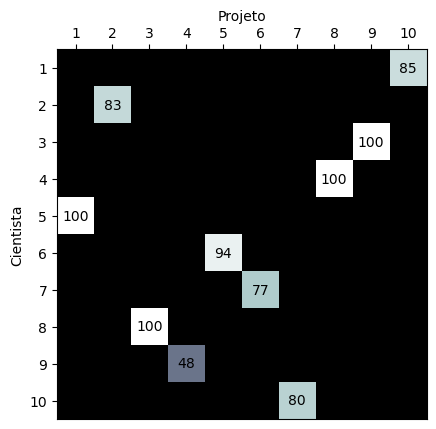

In [6]:
Troca = BestScience.copy()
copia = distance_matrix.copy()
Value = 0
mostrar = []
colunas = [i for i in distance_matrix]

Troca[Troca.index(5)], Troca[Troca.index(9)] = Troca[Troca.index(9)], Troca[Troca.index(5)]
listaTabu = [(f"C5", f"C9")]
for num in range(len(distance_matrix)):
    Value += copia.loc[Troca[num], colunas[num]]
    mostrar.append([Troca[num], colunas[num], copia.loc[Troca[num], colunas[num]]])

lista_ordenada = sorted(mostrar, key=sort_key)
Troca = []
for i in lista_ordenada:
    # print(f"Cientista C{i[0]} no Projeto {i[1]} com uma aptidão de {i[2]}")
    print(f"Projeto \033[1m{i[1]}\033[0m | Cientista \033[1m{i[0]}\033[0m | Aptidão: \033[1m{i[2]}\033[0m")
    Troca.append(i[0])

# Direitos autorais do Botas (deixar negrito)
print("\n======================================================")
print(f"A combinação ótima é: \033[1m{Troca}\033[0m")
print(f"A aptidão total foi: \033[1m{valor_maximo}\033[0m")
print("======================================================")

## Criação da matriz da Respetiva Solução
nodes = len(distance_matrix)
ciencia=np.zeros([nodes,nodes], dtype=int)
for p in range(len(distance_matrix)):
    linha = Troca[p] - 1
    coluna = p
    ciencia[linha][coluna]=copia.loc[linha + 1, copia.columns[p]]

fig, ax = plt.subplots()
im = ax.imshow(ciencia, cmap='bone')

ax.set_xticks(range(nodes))
ax.set_yticks(range(nodes))
ax.set_xticklabels(range(1, nodes + 1))
ax.set_yticklabels(range(1, nodes + 1))
ax.xaxis.set_label_position('top')  # Posicionar o xlabel no topo
ax.xaxis.tick_top()  # Posicionar os ticks no topo
ax.set_xlabel('Projeto')
ax.set_ylabel('Cientista')

for i in range(nodes):
    for j in range(nodes):
        value = ciencia[i, j]
        text = ax.text(j, i, "" if value == 0 else value, ha='center', va='center', color='black')

# Mostrar o gráfico
plt.show()

    Visualizando a resposta acima, podemos visualizar que esta solução vizinha apresenta uma aptidão total inferior à da solução original.
    Podemos então acrescentar esta troca à lista tabu

## Exercicio g, h)

**Relativamente ao código deste exercício, apenas será feita uma visualização da aplicação do algoritmo Tabu caso iniciassemos o algoritmo com esta solução vizinha** \
**Este algoritmo será controlado por uma soma de aptidão máxima e um número de iterações máximas**

    É importante referir que a lista Tabu terá tamanho máxima de 4 e o algoritmo irá para quando ou atingir 100 iterações ou obter uma aptidão máxima superior a 900.


A combinação inicial foi: [5, 2, 8, 9, 6, 7, 10, 4, 3, 1]
A aptidão total inicial foi: 867


,Iterações,Combinações vizinhas,Aptidão Total,ListaTabu
1,1,"[5, 2, 8, 7, 6, 9, 10, 4, 3, 1]",889,"[(7, 9)]"
2,2,"[5, 2, 8, 7, 6, 10, 9, 4, 3, 1]",891,"[(7, 9), (10, 9)]"
3,3,"[9, 2, 8, 7, 6, 10, 5, 4, 3, 1]",894,"[(7, 9), (10, 9), (9, 5)]"
4,4,"[9, 10, 8, 7, 6, 2, 5, 4, 3, 1]",893,"[(7, 9), (10, 9), (9, 5), (10, 2)]"
5,5,"[9, 10, 8, 5, 6, 2, 7, 4, 3, 1]",888,"[(10, 9), (9, 5), (10, 2), (5, 7)]"
6,6,"[9, 10, 8, 5, 6, 2, 1, 4, 3, 7]",883,"[(9, 5), (10, 2), (5, 7), (1, 7)]"
7,7,"[9, 10, 8, 5, 6, 3, 1, 4, 2, 7]",871,"[(10, 2), (5, 7), (1, 7), (3, 2)]"
8,8,"[9, 3, 8, 5, 6, 10, 1, 4, 2, 7]",870,"[(5, 7), (1, 7), (3, 2), (3, 10)]"
9,9,"[9, 3, 8, 5, 2, 10, 1, 4, 6, 7]",867,"[(1, 7), (3, 2), (3, 10), (2, 6)]"
10,10,"[9, 3, 8, 5, 2, 10, 6, 4, 1, 7]",874,"[(3, 2), (3, 10), (2, 6), (6, 1)]"



A combinação ótima é: [9, 2, 8, 6, 10, 3, 5, 4, 1, 7]
A aptidão total foi: 902


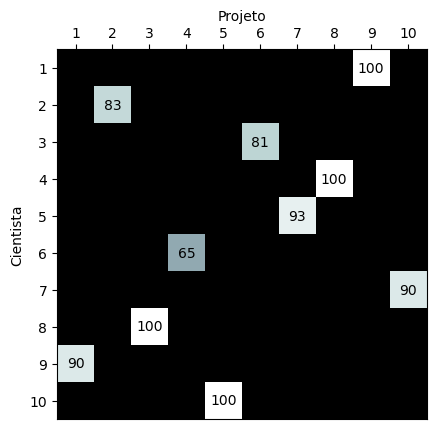

In [7]:
# Algoritmo Tabu

#################### Variáveis que podem ser mudadas ####################
teste = [5, 2, 8, 9, 6, 7, 10, 4, 3, 1] #Solução Inicial
TabuMáximo = 4
if TabuMáximo > 10:
    raise Exception("Talves este tamanho da Lista Tabu não faça sentido...")

#################### Variáveis necessárias para o funcionemnte do algoritmo ####################
allAptidao = []
dfNewBestScience = []
dfNewBestAptidao = []
dfiteracao = []
dflistaTabu = []

copia = distance_matrix.copy()
newMax = 0
iteracao = 0

NewBestAptidao = SomaAptidao(teste, copia) #Função localizada no início
listaTabu = []

intermedioBestScience = 0
intermedioBestAptidao = 0
BestVizinho = 0
NewBestScience = teste.copy()

FinalCombinacao = 0
FinalAptidao = 0

print("\n==========================================================")
print(f"A combinação inicial foi: \033[1m{teste}\033[0m")
print(f"A aptidão total inicial foi: \033[1m{NewBestAptidao}\033[0m")
print("==========================================================")


#################### Algotitmo Tabu ####################
while iteracao != 100 and NewBestAptidao <= 900:
    for i in range(len(teste)):
        for j in range(len(teste)):
            if i != j:
                teste[i], teste[j] = teste[j], teste[i]
                # if (((f"C{teste[i]}",f"P{i+1}"), (f"C{teste[j]}", f"P{j+1}")) not in listaTabu) and (((f"C{teste[i]}",f"P{i+1}"), (f"C{teste[j]}", f"P{j+1}"))[::-1] not in listaTabu):
                if ((teste[i], teste[j]) not in listaTabu) and ((teste[i], teste[j])[::-1] not in listaTabu):
                    coluna = 0
                    for linha in teste:
                        newMax += copia.loc[linha, copia.columns[coluna]]
                        coluna += 1
                    if newMax > intermedioBestAptidao:
                        intermedioBestAptidao = newMax
                        cientista1, cientista2 = teste[i], teste[j]
                        projeto1, projeto2 = i, j
                        BestVizinho = teste.copy()
                    teste = NewBestScience.copy()
                    copia = distance_matrix.copy()
                    newMax = 0
    if FinalAptidao < intermedioBestAptidao:
        FinalCombinacao = BestVizinho
        FinalAptidao = intermedioBestAptidao
    allAptidao.append(intermedioBestAptidao)
    NewBestAptidao = intermedioBestAptidao
    NewBestScience = BestVizinho.copy()
    intermedioBestAptidao = 0
    # listaTabu.append(((f"C{cientista1}",f"P{projeto1+1}"), (f"C{cientista2}", f"P{projeto2+1}")))
    listaTabu.append((cientista1, cientista2))  # Adicionar à lista Tabu as ligações que serão trocadas
    if len(listaTabu) > TabuMáximo:
        listaTabu.remove(listaTabu[0])
    iteracao += 1
    dfNewBestScience.append(NewBestScience)
    dfNewBestAptidao.append(NewBestAptidao)
    dfiteracao.append(iteracao)
    dflistaTabu.append(listaTabu.copy())
    
#################### Output ####################
df = pd.DataFrame({'Iterações': dfiteracao, 
                   'Combinações vizinhas': dfNewBestScience, 
                   'Aptidão Total': dfNewBestAptidao, 
                   'ListaTabu': dflistaTabu})
df.index += 1

df_styled = (df.style
 .set_caption('Algoritmo Tabu')
 # .background_gradient('bone', subset=None, vmin=0, vmax=13)
 # .applymap(lambda x: 'background-color: white; color: black', subset=pd.IndexSlice[:, 'Iterações'])
 .set_properties(**{'text-align': 'center'})
 .set_table_styles(
    [{'selector':'tr:hover',
     'props': [('background-color', 'black'), ('color', 'white')]},
     {'selector': 'th',
     'props': [('background-color', '#257097'), ('color', 'white')]},
     {'selector': 'caption', 
                         'props': [('text-align', 'center'),
                                   ('font-size', '10pt'),
                                   ('font-weight', 'bold')]},
     {'selector': 'th.col_heading', 
                         'props': 'text-align: center'}
    ]))

IPython.display.display(df_styled)

print("\n======================================================")
print(f"A combinação ótima é: \033[1m{FinalCombinacao}\033[0m")
print(f"A aptidão total foi: \033[1m{FinalAptidao}\033[0m")
print("======================================================")

## Criação da matriz da Respetiva Solução
nodes = len(distance_matrix)
ciencia=np.zeros([nodes,nodes], dtype=int)
for p in range(len(distance_matrix)):
    linha = FinalCombinacao[p] - 1
    coluna = p
    ciencia[linha][coluna]=copia.loc[linha + 1, copia.columns[p]] #Colocar o valor de aptidão respetivo na matriz, dando o cientista e o projeto, os restantes fica 0

fig, ax = plt.subplots()
im = ax.imshow(ciencia, cmap='bone')

ax.set_xticks(range(nodes))
ax.set_yticks(range(nodes))
ax.set_xticklabels(range(1, nodes + 1))
ax.set_yticklabels(range(1, nodes + 1))
ax.xaxis.set_label_position('top')  # Posicionar o xlabel no topo
ax.xaxis.tick_top()  # Posicionar os ticks no topo
ax.set_xlabel('Projeto')
ax.set_ylabel('Cientista')

for i in range(nodes):
    for j in range(nodes):
        value = ciencia[i, j]
        text = ax.text(j, i, "" if value == 0 else value, ha='center', va='center', color='black')

# Mostrar o gráfico
plt.show()
del df
del df_styled

### Visualização no gráfico - EXTRA

<Figure size 1200x800 with 0 Axes>

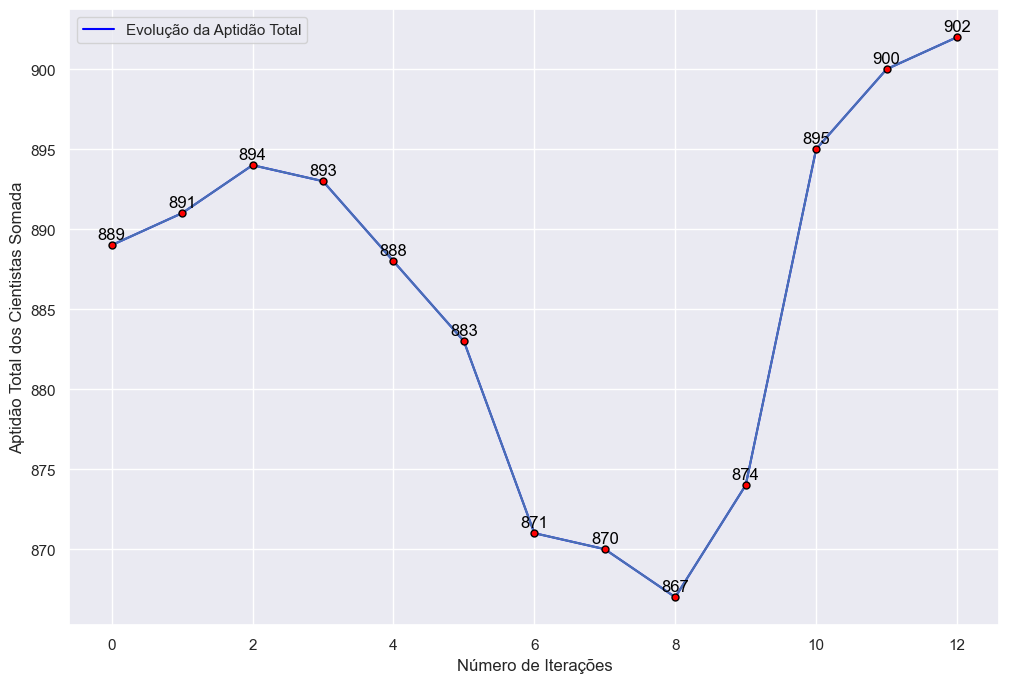

In [8]:
# Dados do gráfico
x = range(len(allAptidao))
y = allAptidao

# Configurar o tema Seaborn
sns.set_theme()

plt.figure(figsize=(12, 8))

# Criar o gráfico de linha
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=x, y=y, ax=ax, color='blue')

# Adicionar bola aos pontos
marker_style = dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='black')

plt.plot(x, y, **marker_style)

# Adicionar valores exatos um pouco acima das bolas
offset = max(allAptidao) * 0.0002  # Offset para posicionar os números acima das bolas
for i, j in zip(x, y):
    ax.text(i, j + offset, str(j), ha='center', va='bottom', color='black')

# Configurar rótulos e legendas
plt.xlabel("Número de Iterações")
plt.ylabel("Aptidão Total dos Cientistas Somada")
plt.legend(["Evolução da Aptidão Total"])

plt.savefig("grafico.svg", format='svg')

# Exibir o gráfico
plt.show()

## Exercício i)

**Aqui será aplicado o algoritmo Tabu, mas irei fazer uma pequena alteração no enunciado.** \
**A solução inicial será uma solução aleatória, a iteração máxima será 100 e aptidão Total miníma será 900**


A combinação inicial foi: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
A aptidão total inicial foi: 714


,Iterações,Combinações vizinhas,Aptidão Total,ListaTabu
1,1,"[5, 2, 3, 4, 1, 6, 7, 8, 9, 10]",780,"[(5, 1)]"
2,2,"[5, 2, 9, 4, 1, 6, 7, 8, 3, 10]",831,"[(5, 1), (9, 3)]"
3,3,"[5, 2, 9, 4, 10, 6, 7, 8, 3, 1]",856,"[(5, 1), (9, 3), (10, 1)]"
4,4,"[5, 2, 9, 4, 6, 10, 7, 8, 3, 1]",873,"[(5, 1), (9, 3), (10, 1), (6, 10)]"
5,5,"[5, 4, 9, 2, 6, 10, 7, 8, 3, 1]",876,"[(9, 3), (10, 1), (6, 10), (4, 2)]"
...,...,...,...,...
96,96,"[3, 8, 9, 6, 10, 2, 5, 4, 1, 7]",877,"[(10, 5), (2, 10), (2, 6), (3, 2)]"
97,97,"[6, 8, 9, 3, 10, 2, 5, 4, 1, 7]",879,"[(2, 10), (2, 6), (3, 2), (6, 3)]"
98,98,"[6, 8, 9, 7, 10, 2, 5, 4, 1, 3]",874,"[(2, 6), (3, 2), (6, 3), (7, 3)]"
99,99,"[6, 8, 9, 7, 10, 2, 5, 4, 3, 1]",895,"[(3, 2), (6, 3), (7, 3), (3, 1)]"



A combinação ótima é: [5, 8, 9, 6, 2, 3, 10, 4, 1, 7]
A aptidão total foi: 899


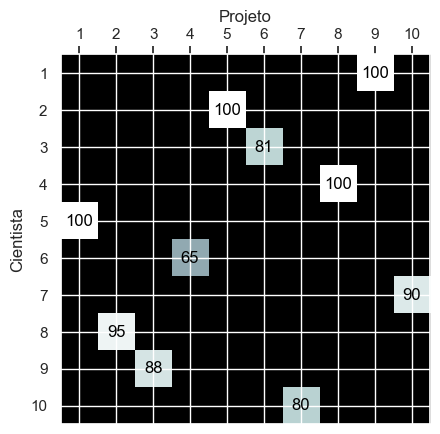

In [9]:
# Algoritmo Tabu

#################### Variáveis que podem ser mudadas ####################
teste = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #Solução Inicial
TabuMáximo = 4
if TabuMáximo > 10:
    raise Exception("Talves este tamanho da Lista Tabu não faça sentido...")

#################### Variáveis necessárias para o funcionemnte do algoritmo ####################
allAptidao = []
dfNewBestScience = []
dfNewBestAptidao = []
dfiteracao = []
dflistaTabu = []

copia = distance_matrix.copy()
newMax = 0
iteracao = 0

NewBestAptidao = SomaAptidao(teste, copia) #Função localizada no início
listaTabu = []

intermedioBestScience = 0
intermedioBestAptidao = 0
BestVizinho = 0
NewBestScience = teste.copy()

FinalCombinacao = 0
FinalAptidao = 0

print("\n==========================================================")
print(f"A combinação inicial foi: \033[1m{teste}\033[0m")
print(f"A aptidão total inicial foi: \033[1m{NewBestAptidao}\033[0m")
print("==========================================================")


#################### Algotitmo Tabu ####################
while iteracao != 100 and NewBestAptidao <= 900:
    for i in range(len(teste)):
        for j in range(len(teste)):
            if i != j:
                teste[i], teste[j] = teste[j], teste[i]
                # if (((f"C{teste[i]}",f"P{i+1}"), (f"C{teste[j]}", f"P{j+1}")) not in listaTabu) and (((f"C{teste[i]}",f"P{i+1}"), (f"C{teste[j]}", f"P{j+1}"))[::-1] not in listaTabu):
                if ((teste[i], teste[j]) not in listaTabu) and ((teste[i], teste[j])[::-1] not in listaTabu):
                    coluna = 0
                    for linha in teste:
                        newMax += copia.loc[linha, copia.columns[coluna]]
                        coluna += 1
                    if newMax > intermedioBestAptidao:
                        intermedioBestAptidao = newMax
                        cientista1, cientista2 = teste[i], teste[j]
                        projeto1, projeto2 = i, j
                        BestVizinho = teste.copy()
                    teste = NewBestScience.copy()
                    copia = distance_matrix.copy()
                    newMax = 0
    if FinalAptidao < intermedioBestAptidao:
        FinalCombinacao = BestVizinho
        FinalAptidao = intermedioBestAptidao
    allAptidao.append(intermedioBestAptidao)
    NewBestAptidao = intermedioBestAptidao
    NewBestScience = BestVizinho.copy()
    intermedioBestAptidao = 0
    # listaTabu.append(((f"C{cientista1}",f"P{projeto1+1}"), (f"C{cientista2}", f"P{projeto2+1}")))
    listaTabu.append((cientista1, cientista2))  # Adicionar à lista Tabu as ligações que serão trocadas
    if len(listaTabu) > TabuMáximo:
        listaTabu.remove(listaTabu[0])
    iteracao += 1
    dfNewBestScience.append(NewBestScience)
    dfNewBestAptidao.append(NewBestAptidao)
    dfiteracao.append(iteracao)
    dflistaTabu.append(listaTabu.copy())
    
#################### Output ####################
df = pd.DataFrame({'Iterações': dfiteracao, 
                   'Combinações vizinhas': dfNewBestScience, 
                   'Aptidão Total': dfNewBestAptidao, 
                   'ListaTabu': dflistaTabu})
df.index += 1

df_head = df.head(5)
df_tail = df.tail(5)
df_dots = pd.DataFrame(columns=df.columns)
df_dots.loc[0] = ['...' if col == 'Iterações' else '' for col in df.columns]
df_dots = pd.DataFrame(index=["..."], columns=df.columns).fillna("...")
df_display = pd.concat([df_head, df_dots, df_tail])

df_styled = (df_display.style
 .set_caption('Algoritmo Tabu')
 .set_properties(**{'text-align': 'center'})
 .set_table_styles(
    [{'selector':'tr:hover',
     'props': [('background-color', 'black'), ('color', 'white')]},
     {'selector': 'th',
     'props': [('background-color', '#257097'), ('color', 'white')]},
     {'selector': 'caption', 
                         'props': [('text-align', 'center'),
                                   ('font-size', '10pt'),
                                   ('font-weight', 'bold')]},
     {'selector': 'th.col_heading', 
                         'props': 'text-align: center'}
    ]))

IPython.display.display(df_styled)

print("\n======================================================")
print(f"A combinação ótima é: \033[1m{FinalCombinacao}\033[0m")
print(f"A aptidão total foi: \033[1m{FinalAptidao}\033[0m")
print("======================================================")

## Criação da matriz da Respetiva Solução
nodes = len(distance_matrix)
ciencia=np.zeros([nodes,nodes], dtype=int)
for p in range(len(distance_matrix)):
    linha = FinalCombinacao[p] - 1
    coluna = p
    ciencia[linha][coluna]=copia.loc[linha + 1, copia.columns[p]] #Colocar o valor de aptidão respetivo na matriz, dando o cientista e o projeto, os restantes fica 0

fig, ax = plt.subplots()
im = ax.imshow(ciencia, cmap='bone')

ax.set_xticks(range(nodes))
ax.set_yticks(range(nodes))
ax.set_xticklabels(range(1, nodes + 1))
ax.set_yticklabels(range(1, nodes + 1))
ax.xaxis.set_label_position('top')  # Posicionar o xlabel no topo
ax.xaxis.tick_top()  # Posicionar os ticks no topo
ax.set_xlabel('Projeto')
ax.set_ylabel('Cientista')

for i in range(nodes):
    for j in range(nodes):
        value = ciencia[i, j]
        text = ax.text(j, i, "" if value == 0 else value, ha='center', va='center', color='black')

# Mostrar o gráfico
plt.show()
del df
del df_styled

### Visualização no gráfico - EXTRA

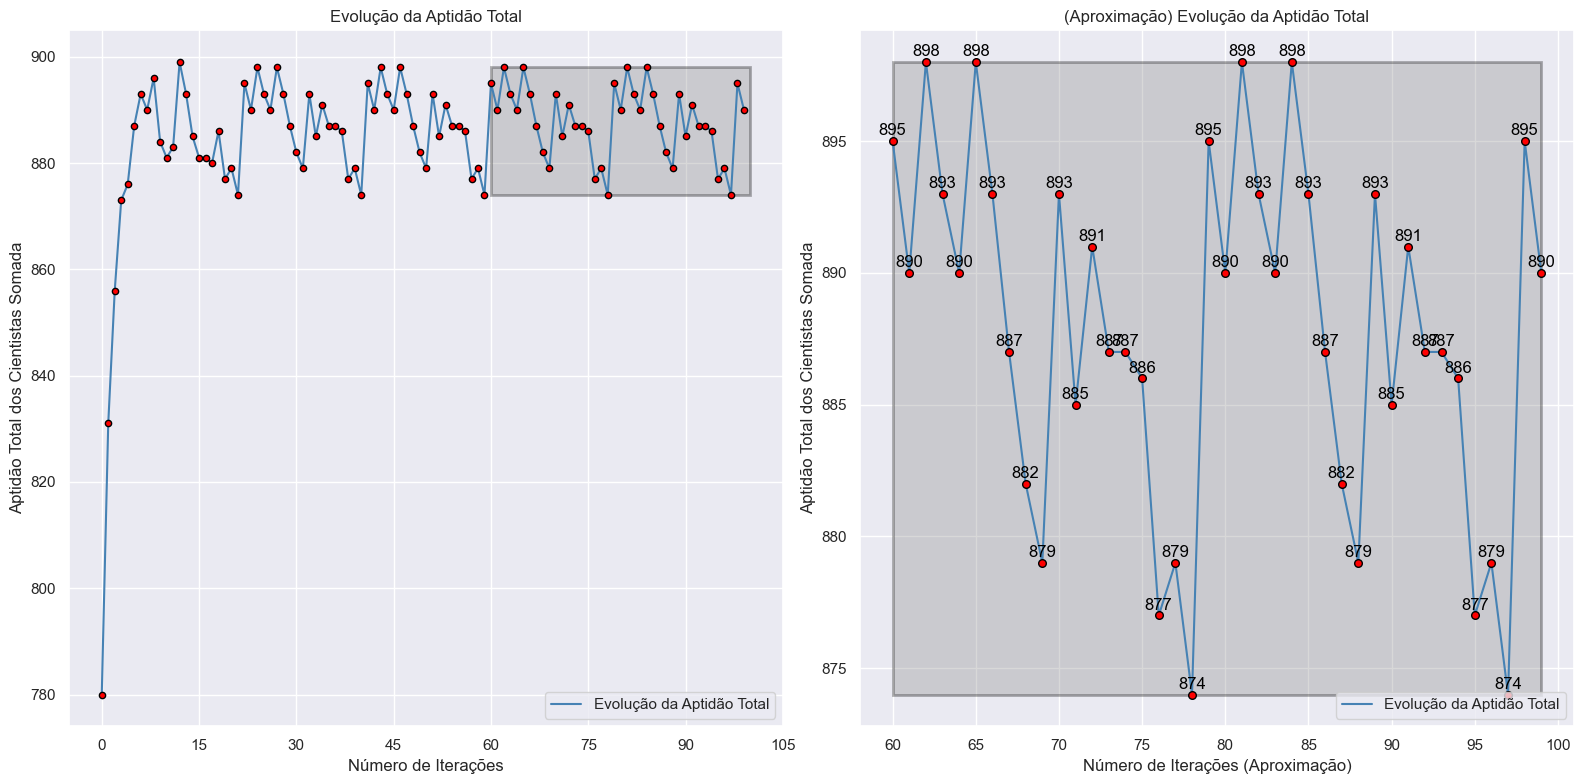

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_evolution_graph(x, y, marker_size_left, marker_size_right, subset_percentage):
    # Configurar o tema Seaborn
    sns.set_theme(style="darkgrid")

    # Aumentar o tamanho da figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Gráfico da esquerda (Evolução da Aptidão Total)
    sns.lineplot(x=x, y=y, ax=ax1, color='#4682b4', legend=False)
    for i, j in zip(x, y):
        ax1.plot(i, j, marker='o', markersize=marker_size_left, markerfacecolor='red', markeredgecolor='black', label=None)
    ax1.set_xlabel("Número de Iterações")
    ax1.set_ylabel("Aptidão Total dos Cientistas Somada")
    ax1.legend(["Evolução da Aptidão Total"], loc='lower right')
    ax1.set_title("Evolução da Aptidão Total")

    # Gráfico da direita (Aproximação para Iteração >= 70%)
    subset_index = int(len(x) * subset_percentage)
    x_subset = x[subset_index:]
    y_subset = y[subset_index:]
    sns.lineplot(x=x_subset, y=y_subset, ax=ax2, color='#4682b4', legend=False)
    for i, j in zip(x_subset, y_subset):
        ax2.plot(i, j, marker='o', markersize=marker_size_right, markerfacecolor='red', markeredgecolor='black', label=None)
        ax2.text(i, j + .1, str(j), ha='center', va='bottom', color='black')
    ax2.set_xlabel("Número de Iterações (Aproximação)")
    ax2.set_ylabel("Aptidão Total dos Cientistas Somada")
    ax2.legend(["Evolução da Aptidão Total"], loc='lower right')
    ax2.set_title("(Aproximação) Evolução da Aptidão Total")

    # Adicionar retângulo destacando a região do segundo gráfico dentro do primeiro
    rect = plt.Rectangle((subset_index, min(y_subset)), len(x) - subset_index, max(y_subset) - min(y_subset),
                         facecolor='grey', edgecolor='black', alpha=0.3, linewidth=2)
    ax1.add_patch(rect)

    # Adicionar retângulo cinza abrangendo todo o segundo gráfico
    rect_full = plt.Rectangle((min(x_subset), min(y_subset)), max(x_subset) - min(x_subset), max(y_subset) - min(y_subset),
                              facecolor='grey', edgecolor='black', alpha=0.3, linewidth=2)
    ax2.add_patch(rect_full)

    # Ajustar o espaçamento entre os subplots
    plt.tight_layout()

    # Definir o formato dos ticks do eixo x como inteiros
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Exibir os gráficos
    plt.savefig("aleatorio.svg", format='svg')
    plt.show()

# Dados do gráfico
x = range(len(allAptidao))
y = allAptidao

# Tamanho das bolas para o gráfico da esquerda (Evolução da Aptidão Total)
marker_size_left = 4.5

# Tamanho das bolas para o gráfico da direita (Aproximação para Iteração >= 70%)
marker_size_right = 5.5

# Porcentagem dos dados a partir da qual exibir no segundo gráfico
subset_percentage = 0.6

# Gerar e exibir os gráficos
plot_evolution_graph(x, y, marker_size_left, marker_size_right, subset_percentage)

### Extra com a heurística inicial

#### Lista Tabu


A combinação inicial foi: [9, 2, 8, 5, 6, 7, 10, 4, 3, 1]
A aptidão total inicial foi: 886


,Iterações,Combinações vizinhas,Aptidão Total,ListaTabu
1,1,"[9, 2, 8, 5, 6, 10, 7, 4, 3, 1]",889,"[(10, 7)]"
2,2,"[9, 2, 8, 7, 6, 10, 5, 4, 3, 1]",894,"[(10, 7), (7, 5)]"
3,3,"[9, 10, 8, 7, 6, 2, 5, 4, 3, 1]",893,"[(10, 7), (7, 5), (10, 2)]"
4,4,"[5, 10, 8, 7, 6, 2, 9, 4, 3, 1]",890,"[(10, 7), (7, 5), (10, 2), (5, 9)]"
5,5,"[5, 10, 8, 7, 6, 3, 9, 4, 2, 1]",878,"[(10, 7), (7, 5), (10, 2), (5, 9), (3, 2)]"
...,...,...,...,...
11,11,"[6, 3, 8, 5, 2, 9, 10, 4, 1, 7]",882,"[(9, 10), (2, 6), (1, 6), (6, 7), (6, 5)]"
12,12,"[6, 3, 8, 10, 2, 9, 5, 4, 1, 7]",878,"[(2, 6), (1, 6), (6, 7), (6, 5), (10, 5)]"
13,13,"[9, 3, 8, 10, 6, 2, 5, 4, 1, 7]",889,"[(1, 6), (6, 7), (6, 5), (10, 5), (9, 2)]"
14,14,"[9, 3, 8, 6, 10, 2, 5, 4, 1, 7]",900,"[(6, 7), (6, 5), (10, 5), (9, 2), (6, 10)]"



A combinação ótima é: [9, 2, 8, 6, 10, 3, 5, 4, 1, 7]
A aptidão total foi: 902


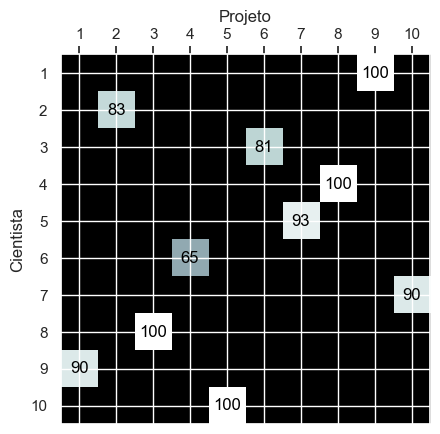

In [11]:
# Algoritmo Tabu

#################### Variáveis que podem ser mudadas ####################
teste = [9, 2, 8, 5, 6, 7, 10, 4, 3, 1] #Solução Inicial
TabuMáximo = 5
if TabuMáximo > 10:
    raise Exception("Talves este tamanho da Lista Tabu não faça sentido...")

#################### Variáveis necessárias para o funcionemnte do algoritmo ####################
allAptidao = []
dfNewBestScience = []
dfNewBestAptidao = []
dfiteracao = []
dflistaTabu = []

copia = distance_matrix.copy()
newMax = 0
iteracao = 0

NewBestAptidao = SomaAptidao(teste, copia) #Função localizada no início
listaTabu = []

intermedioBestScience = 0
intermedioBestAptidao = 0
BestVizinho = 0
NewBestScience = teste.copy()

FinalCombinacao = 0
FinalAptidao = 0

print("\n==========================================================")
print(f"A combinação inicial foi: \033[1m{teste}\033[0m")
print(f"A aptidão total inicial foi: \033[1m{NewBestAptidao}\033[0m")
print("==========================================================")


#################### Algotitmo Tabu ####################
while iteracao != 100 and NewBestAptidao <= 900:
    for i in range(len(teste)):
        for j in range(len(teste)):
            if i != j:
                teste[i], teste[j] = teste[j], teste[i]
                # if (((f"C{teste[i]}",f"P{i+1}"), (f"C{teste[j]}", f"P{j+1}")) not in listaTabu) and (((f"C{teste[i]}",f"P{i+1}"), (f"C{teste[j]}", f"P{j+1}"))[::-1] not in listaTabu):
                if ((teste[i], teste[j]) not in listaTabu) and ((teste[i], teste[j])[::-1] not in listaTabu):
                    coluna = 0
                    for linha in teste:
                        newMax += copia.loc[linha, copia.columns[coluna]]
                        coluna += 1
                    if newMax > intermedioBestAptidao:
                        intermedioBestAptidao = newMax
                        cientista1, cientista2 = teste[i], teste[j]
                        projeto1, projeto2 = i, j
                        BestVizinho = teste.copy()
                    teste = NewBestScience.copy()
                    copia = distance_matrix.copy()
                    newMax = 0
    if FinalAptidao < intermedioBestAptidao:
        FinalCombinacao = BestVizinho
        FinalAptidao = intermedioBestAptidao
    allAptidao.append(intermedioBestAptidao)
    NewBestAptidao = intermedioBestAptidao
    NewBestScience = BestVizinho.copy()
    intermedioBestAptidao = 0
    # listaTabu.append(((f"C{cientista1}",f"P{projeto1+1}"), (f"C{cientista2}", f"P{projeto2+1}")))
    listaTabu.append((cientista1, cientista2))  # Adicionar à lista Tabu as ligações que serão trocadas
    if len(listaTabu) > TabuMáximo:
        listaTabu.remove(listaTabu[0])
    iteracao += 1
    dfNewBestScience.append(NewBestScience)
    dfNewBestAptidao.append(NewBestAptidao)
    dfiteracao.append(iteracao)
    dflistaTabu.append(listaTabu.copy())
    
#################### Output ####################
df = pd.DataFrame({'Iterações': dfiteracao, 
                   'Combinações vizinhas': dfNewBestScience, 
                   'Aptidão Total': dfNewBestAptidao, 
                   'ListaTabu': dflistaTabu})
df.index += 1

df_head = df.head(5)
df_tail = df.tail(5)
df_dots = pd.DataFrame(columns=df.columns)
df_dots.loc[0] = ['...' if col == 'Iterações' else '' for col in df.columns]
df_dots = pd.DataFrame(index=["..."], columns=df.columns).fillna("...")
df_display = pd.concat([df_head, df_dots, df_tail])

df_styled = (df_display.style
 .set_caption('Algoritmo Tabu')
 .set_properties(**{'text-align': 'center'})
 .set_table_styles(
    [{'selector':'tr:hover',
     'props': [('background-color', 'black'), ('color', 'white')]},
     {'selector': 'th',
     'props': [('background-color', '#257097'), ('color', 'white')]},
     {'selector': 'caption', 
                         'props': [('text-align', 'center'),
                                   ('font-size', '10pt'),
                                   ('font-weight', 'bold')]},
     {'selector': 'th.col_heading', 
                         'props': 'text-align: center'}
    ]))

IPython.display.display(df_styled)

print("\n======================================================")
print(f"A combinação ótima é: \033[1m{FinalCombinacao}\033[0m")
print(f"A aptidão total foi: \033[1m{FinalAptidao}\033[0m")
print("======================================================")

## Criação da matriz da Respetiva Solução
nodes = len(distance_matrix)
ciencia=np.zeros([nodes,nodes], dtype=int)
for p in range(len(distance_matrix)):
    linha = FinalCombinacao[p] - 1
    coluna = p
    ciencia[linha][coluna]=copia.loc[linha + 1, copia.columns[p]] #Colocar o valor de aptidão respetivo na matriz, dando o cientista e o projeto, os restantes fica 0

fig, ax = plt.subplots()
im = ax.imshow(ciencia, cmap='bone')

ax.set_xticks(range(nodes))
ax.set_yticks(range(nodes))
ax.set_xticklabels(range(1, nodes + 1))
ax.set_yticklabels(range(1, nodes + 1))
ax.xaxis.set_label_position('top')  # Posicionar o xlabel no topo
ax.xaxis.tick_top()  # Posicionar os ticks no topo
ax.set_xlabel('Projeto')
ax.set_ylabel('Cientista')

for i in range(nodes):
    for j in range(nodes):
        value = ciencia[i, j]
        text = ax.text(j, i, "" if value == 0 else value, ha='center', va='center', color='black')

# Mostrar o gráfico
plt.show()
del df
del df_styled

#### Visualização dos Gráficos

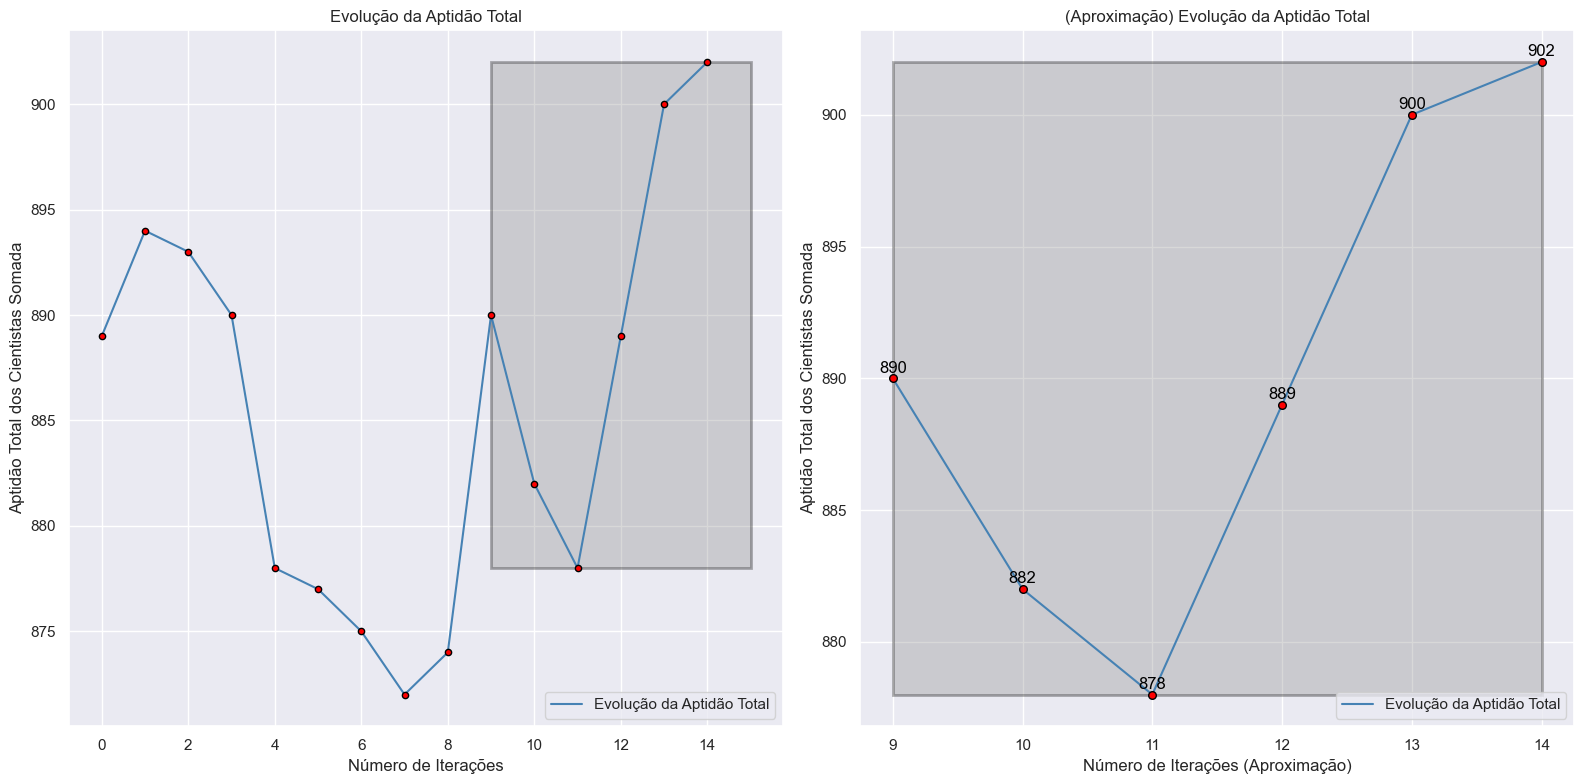

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_evolution_graph(x, y, marker_size_left, marker_size_right, subset_percentage):
    # Configurar o tema Seaborn
    sns.set_theme(style="darkgrid")

    # Aumentar o tamanho da figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Gráfico da esquerda (Evolução da Aptidão Total)
    sns.lineplot(x=x, y=y, ax=ax1, color='#4682b4', legend=False)
    for i, j in zip(x, y):
        ax1.plot(i, j, marker='o', markersize=marker_size_left, markerfacecolor='red', markeredgecolor='black', label=None)
    ax1.set_xlabel("Número de Iterações")
    ax1.set_ylabel("Aptidão Total dos Cientistas Somada")
    ax1.legend(["Evolução da Aptidão Total"], loc='lower right')
    ax1.set_title("Evolução da Aptidão Total")

    # Gráfico da direita (Aproximação para Iteração >= 70%)
    subset_index = int(len(x) * subset_percentage)
    x_subset = x[subset_index:]
    y_subset = y[subset_index:]
    sns.lineplot(x=x_subset, y=y_subset, ax=ax2, color='#4682b4', legend=False)
    for i, j in zip(x_subset, y_subset):
        ax2.plot(i, j, marker='o', markersize=marker_size_right, markerfacecolor='red', markeredgecolor='black', label=None)
        ax2.text(i, j + .1, str(j), ha='center', va='bottom', color='black')
    ax2.set_xlabel("Número de Iterações (Aproximação)")
    ax2.set_ylabel("Aptidão Total dos Cientistas Somada")
    ax2.legend(["Evolução da Aptidão Total"], loc='lower right')
    ax2.set_title("(Aproximação) Evolução da Aptidão Total")

    # Adicionar retângulo destacando a região do segundo gráfico dentro do primeiro
    rect = plt.Rectangle((subset_index, min(y_subset)), len(x) - subset_index, max(y_subset) - min(y_subset),
                         facecolor='grey', edgecolor='black', alpha=0.3, linewidth=2)
    ax1.add_patch(rect)

    # Adicionar retângulo cinza abrangendo todo o segundo gráfico
    rect_full = plt.Rectangle((min(x_subset), min(y_subset)), max(x_subset) - min(x_subset), max(y_subset) - min(y_subset),
                              facecolor='grey', edgecolor='black', alpha=0.3, linewidth=2)
    ax2.add_patch(rect_full)

    # Ajustar o espaçamento entre os subplots
    plt.tight_layout()

    # Definir o formato dos ticks do eixo x como inteiros
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Exibir os gráficos
    plt.savefig("inicial.svg", format='svg')
    plt.show()

# Dados do gráfico
x = range(len(allAptidao))
y = allAptidao

# Tamanho das bolas para o gráfico da esquerda (Evolução da Aptidão Total)
marker_size_left = 4.5

# Tamanho das bolas para o gráfico da direita (Aproximação para Iteração >= 70%)
marker_size_right = 5.5

# Porcentagem dos dados a partir da qual exibir no segundo gráfico
subset_percentage = 0.6

# Gerar e exibir os gráficos
plot_evolution_graph(x, y, marker_size_left, marker_size_right, subset_percentage)

- - -